# HEALTH INSURANCE COST PREDICTION📈📊

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import style
import seaborn as sns

In [2]:
Insurance=pd.read_csv("insurance.csv")

In [3]:
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
Insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
Insurance.shape

(1338, 7)

In [6]:
Insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
Insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
Insurance.duplicated().any()

True

In [10]:
Insurance[Insurance.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [11]:
Insurance_data=Insurance.drop_duplicates()

In [12]:
Insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
Numaric_columns=Insurance_data.select_dtypes(include="number").columns.to_list()
Categorical_columns=Insurance_data.select_dtypes(exclude="number").columns.to_list()
print(f"Numarical columns in the data:{Numaric_columns}")
print(f"Categorical columns in the data:{Categorical_columns}")


Numarical columns in the data:['age', 'bmi', 'children', 'charges']
Categorical columns in the data:['sex', 'smoker', 'region']


In [14]:
Insurance_data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
Insurance_data["sex"].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

Text(0.5, 1.0, 'sex Distibution')

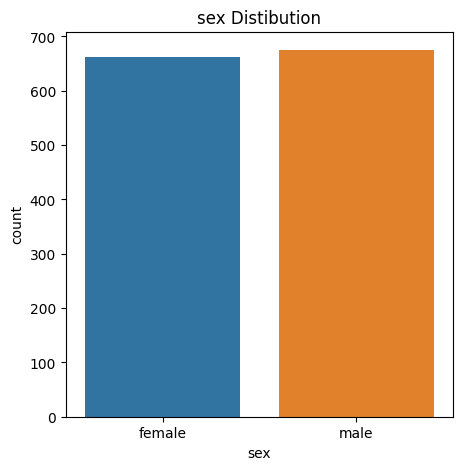

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(data=Insurance_data,x="sex")
plt.title("sex Distibution")

C:\Users\Bijoy Paul\AppData\Local\Temp\ipykernel_13676\3698530639.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Insurance_data["age"])


Text(0.5, 1.0, 'Age Distibution')

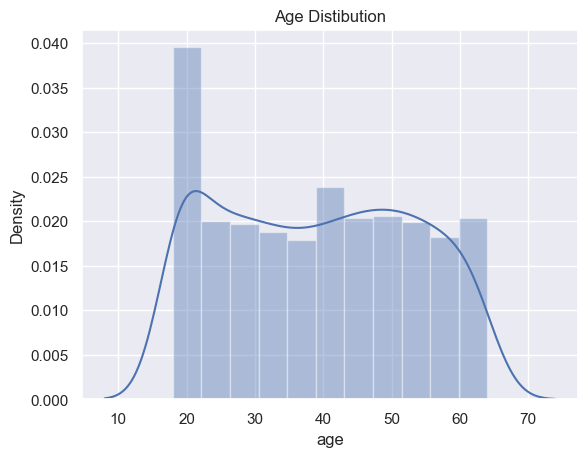

In [17]:
sns.set()
sns.distplot(Insurance_data["age"])
plt.title("Age Distibution")

Text(0.5, 1.0, 'BMI Distibution')

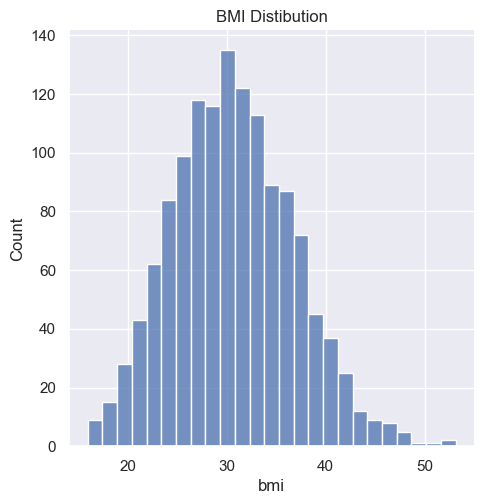

In [18]:


sns.displot(data=Insurance_data["bmi"])
plt.title("BMI Distibution")

In [19]:
Insurance_data["children"].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

Text(0.5, 1.0, 'Children Distibution')

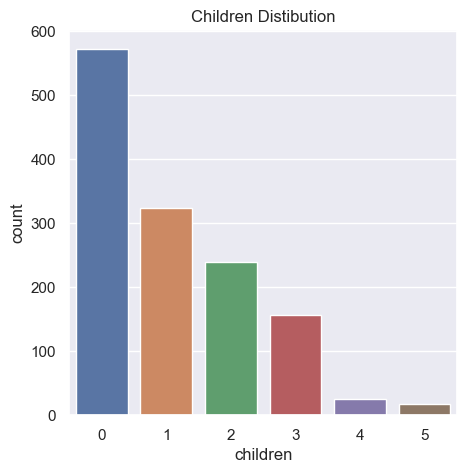

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(data=Insurance_data,x="children")
plt.title("Children Distibution")

Text(0.5, 1.0, 'charges Distibution')

<Figure size 500x500 with 0 Axes>

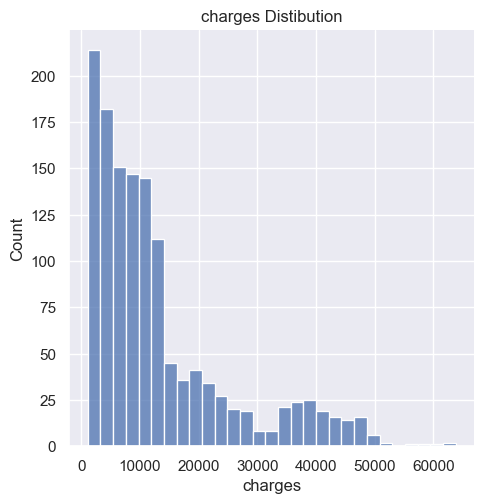

In [21]:

plt.figure(figsize=(5,5))
sns.displot(data=Insurance_data["charges"])
plt.title("charges Distibution")

In [22]:
Insurance_data["smoker"].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

Text(0.5, 1.0, 'smoker')

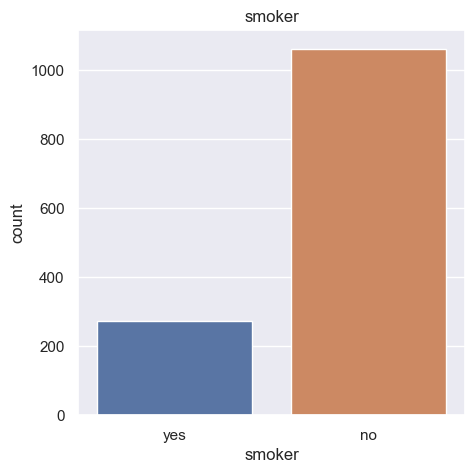

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(data=Insurance_data,x="smoker")
plt.title("smoker")

In [24]:
region_count=Insurance_data["region"].value_counts()
region_count

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

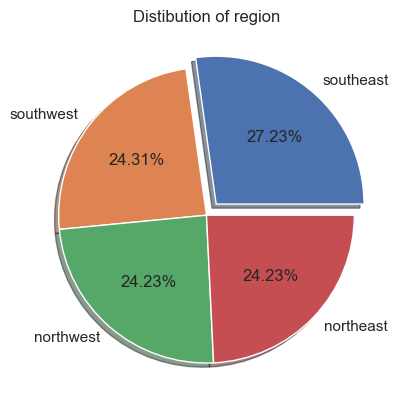

In [25]:
  plt.pie(labels=region_count.index,
          x=region_count.values,
        shadow=True,
        autopct='%.2f%%',
        explode=(0.1,0,0,0))
plt.title("Distibution of region")
plt.show()

In [26]:
corr_data=Insurance_data[['age', 'bmi', 'charges']].corr()

Text(0.5, 1.0, 'Correlation Hatmap: Age, BMI and Charges')

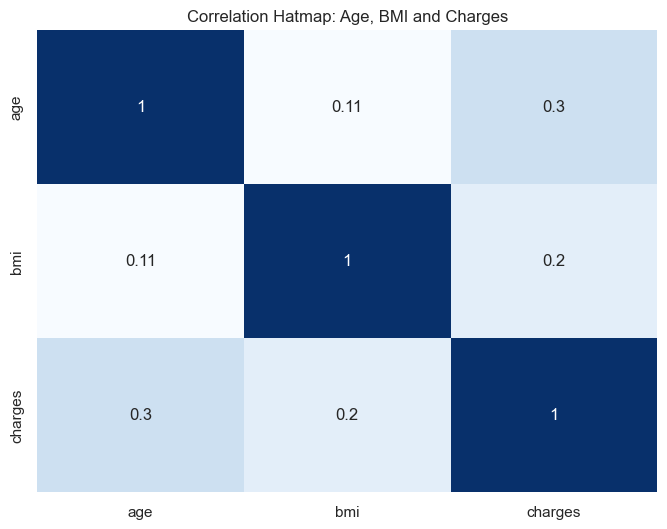

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(round(corr_data,2),annot=True,cmap="Blues",cbar=False)
plt.title("Correlation Hatmap: Age, BMI and Charges")

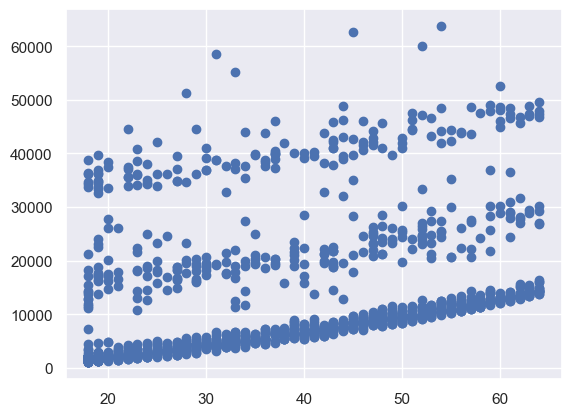

In [28]:
plt.scatter(data=Insurance_data,x="age",y="charges")

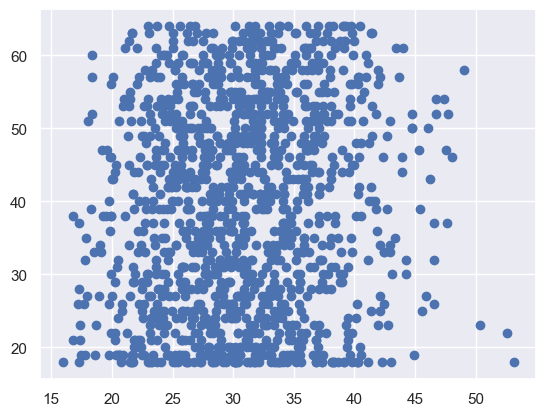

In [29]:
plt.scatter(data=Insurance_data,x="bmi",y="age")

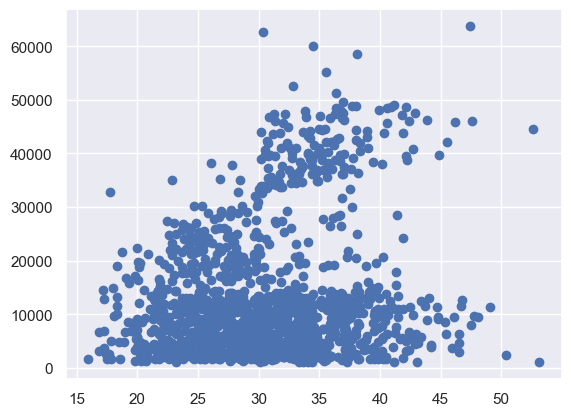

In [30]:
plt.scatter(data=Insurance_data,x="bmi",y="charges")

## Insurance cost for Smoker and Non smoaker:

In [31]:
Smoker_df=Insurance_data.groupby("smoker")['charges'].mean().reset_index()

In [32]:
Smoker_df

,smoker,charges
0,no,8440.660307
1,yes,32050.231832


<Axes: xlabel='smoker', ylabel='charges'>

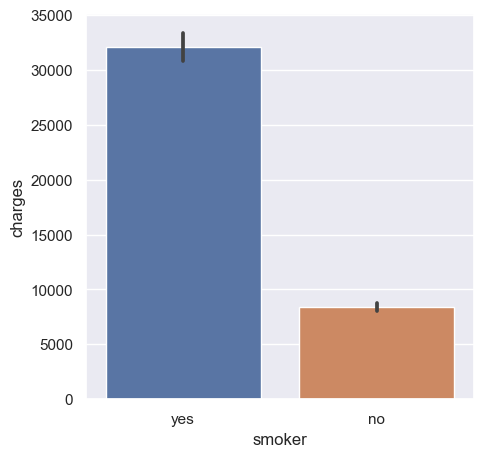

In [33]:
plt.figure(figsize=(5,5))
sns.barplot(x='smoker',y='charges',data=Insurance_data)

## Insurance cost for Male and Female:

In [34]:
gender_df=Insurance_data.groupby("sex")['charges'].mean().reset_index()

In [35]:
gender_df

,sex,charges
0,female,12569.578844
1,male,13974.998864


<Axes: xlabel='sex'>

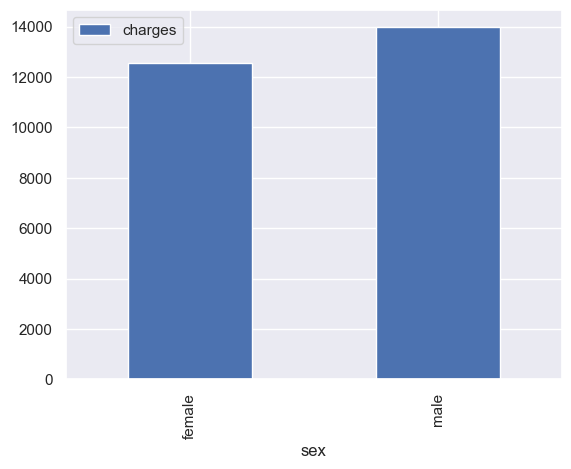

In [36]:
gender_df.plot(kind='bar',x='sex',y='charges')

## Region Wise Insurance cost:

In [37]:
region_df=Insurance_data.groupby("region")['charges'].mean().reset_index()

In [38]:
region_df

,region,charges
0,northeast,13406.384516
1,northwest,12450.840844
2,southeast,14735.411438
3,southwest,12346.937377


<Axes: xlabel='region', ylabel='charges'>

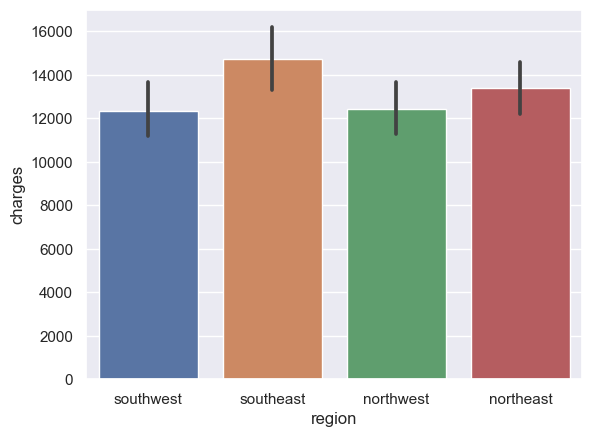

In [39]:
sns.barplot(x='region',y='charges',data=Insurance_data)

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [41]:
Insurance_data["sex"]=le.fit_transform(Insurance_data['sex'])
Insurance_data["smoker"]=le.fit_transform(Insurance_data['smoker'])
Insurance_data["region"]=le.fit_transform(Insurance_data['region'])

C:\Users\Bijoy Paul\AppData\Local\Temp\ipykernel_13676\1476141083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Insurance_data["sex"]=le.fit_transform(Insurance_data['sex'])
C:\Users\Bijoy Paul\AppData\Local\Temp\ipykernel_13676\1476141083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Insurance_data["smoker"]=le.fit_transform(Insurance_data['smoker'])
C:\Users\Bijoy Paul\AppData\Local\Temp\ipykernel_13676\1476141083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [42]:
Insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [43]:
x=Insurance_data.drop(columns=["charges"],axis=1)
y=Insurance_data["charges"]

In [44]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [45]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

### Split the data into traning and testing:

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
model=LinearRegression()

In [51]:
model.fit(x_train,y_train)

LinearRegression()

In [52]:
ans=model.predict([[21,0,25.800,0,0,3]])
print("your Insurance cost is", ans)

your Insurance cost is [1528.79685196]


C:\Users\Bijoy Paul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [53]:
 model.score(x_test,y_test)

0.8068466322629112

# OBJECTIVE:


##              Creat a model that can predict the cost of health insurance based on ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'] parameter 


# Ovservation:

### 1.In this data we have 7 columns which are:
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Numarical columns in the data:['age', 'bmi', 'children', 'charges']

Categorical columns in the data:['sex', 'smoker', 'region']
            

### 2.Male andd Female count



### 3.% of children distibution



### 4.Charges Distibution

### 5.Region wise distibution

### 6.Insurance cost for smoaker and non smoaker


### 7.Create a Prediction model

##### your Insurance cost is [1528.79685196]

##### Model accuracy is 80%